In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [3]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')


C:\Users\Rafael\AppData\Local\Temp\ipykernel_1652\3511105390.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')


In [4]:
pd.set_option('display.max_columns', 300)
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [5]:
data.shape

(320772, 162)

In [6]:
pd.set_option('display.max_rows', 1000)
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [7]:
threshold = 0.5

# Filtrer les colonnes ayant au moins 80 % de valeurs non nulles
columns_to_keep = data.columns[data.notnull().mean() >= threshold]

# Créer un nouveau DataFrame avec uniquement les colonnes filtrées
filtered_df = data[columns_to_keep]

# Sauvegarder le DataFrame nettoyé (optionnel)
# filtered_df.to_csv('openfoodfacts_filtered.csv', index=False)

print(f"Nombre de colonnes initial : {data.shape[1]}")
print(f"Nombre de colonnes après filtrage : {filtered_df.shape[1]}")

Nombre de colonnes initial : 162
Nombre de colonnes après filtrage : 34


In [8]:
filtered_df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [9]:
filtered_df.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.00,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.25,0.0,0.0


In [10]:
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

Handle Dates: created_t

In [11]:
# Filtrer les valeurs non numériques
non_numeric_values = filtered_df['created_t'][filtered_df['created_t'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()]

# Compter les occurrences des valeurs non numériques
result = non_numeric_values.value_counts()

print(result)


created_t
France                                   6
Villers Bocage 80260,France              3
Veynes,France                            2
Marseille 5°,France                      2
Villecresnes,Villeurbanne,France         1
Torcy 77,France                          1
Saint-Priest,France                      1
Montgermont                              1
France,Nantes,Carquefou                  1
Courrières,France                        1
Brétigny-sur-Orge,Marseille 5°,France    1
Name: count, dtype: int64


In [12]:
# Remplacer les valeures non dates par Nan
filtered_df['created_t'] = filtered_df['created_t'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Cast en date pandas
filtered_df['created_t'] = pd.to_datetime(filtered_df['created_t'], unit='s')

C:\Users\Rafael\AppData\Local\Temp\ipykernel_1652\3213780337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_t'] = filtered_df['created_t'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
C:\Users\Rafael\AppData\Local\Temp\ipykernel_1652\3213780337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_t'] = pd.to_datetime(filtered_df['created_t'], unit='s')


Handle Dates: created_datetime

In [13]:
# Cast en date pandas
filtered_df['created_datetime'] = filtered_df['created_datetime'].apply(lambda x: pd.to_datetime(x, errors='coerce'))

C:\Users\Rafael\AppData\Local\Temp\ipykernel_1652\3933566766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_datetime'] = filtered_df['created_datetime'].apply(lambda x: pd.to_datetime(x, errors='coerce'))


Conversion pour les colonnes evidentes

In [14]:
# cast to correct types for rest of columns
filtered_df['ingredients_that_may_be_from_palm_oil_n'] = filtered_df['ingredients_that_may_be_from_palm_oil_n'].astype('bool')
filtered_df['nutrition_grade_fr'] = filtered_df['nutrition_grade_fr'].astype('category')

C:\Users\Rafael\AppData\Local\Temp\ipykernel_1652\1915215048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ingredients_that_may_be_from_palm_oil_n'] = filtered_df['ingredients_that_may_be_from_palm_oil_n'].astype('bool')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_1652\1915215048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['nutrition_grade_fr'] = filtered_df['nutrition_grade_fr'].astype('category')


Redressement des colonnes categorielles

In [15]:
filtered_df['countries'].value_counts()

countries
US                                            169928
France                                         77292
en:FR                                          16979
Suisse                                         12314
Deutschland                                     6161
                                               ...  
Tschechien,Dänemark,Frankreich,Deutschland         1
Danemark,Allemagne,France                          1
Dänemark,Frankreich,Deutschland,Indien             1
Dänemark                                           1
Hong Kong,China                                    1
Name: count, Length: 1434, dtype: int64

In [16]:
#Verif avec Samir
# Garder aussi les produits qui contienent une des valeures du tableau
def filter_france_products(dataframe):
    france_strings = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
                  'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
                  'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
                  'Polynésie Française', 'Mayotte']
    dataframe = dataframe.drop(['nutrition-score-uk_100g'],axis=1)    
    return dataframe[dataframe['countries'].isin(france_strings)]

france_prodcuts_df = filter_france_products(filtered_df)

In [17]:
# Je choisir la colonne 'ingredients_that_may_be_from_palm_oil_n' comme cible
# Il faut donc supprimer toutes les lignes ou cette colonne n'est par référenée

In [18]:
france_prodcuts_df = france_prodcuts_df[~france_prodcuts_df['ingredients_from_palm_oil_n'].isna()]

In [19]:
france_prodcuts_df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
182,5200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,2015-09-02 09:37:37,2015-09-02 09:37:37+00:00,1442570752,2015-09-18T10:05:52Z,lentilles vertes,Bertrand Lejeune,bertrand-lejeune,France,en:france,France,lentilles vertes,NaN,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,0.0,False,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,7730009,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-05-09 15:07:12,2016-05-09 15:07:12+00:00,1482359150,2016-12-21T22:25:50Z,Biscuits sablés fourrage au cacao,St Michel,st-michel,France,en:france,France,"Sucre, farine de _Blé_, graisse et huiles végé...",NaN,3.0,[ sucre -> fr:sucre ] [ farine-de-ble -> fr...,0.0,True,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,10090206,http://world-fr.openfoodfacts.org/produit/0000...,sebleouf,2013-06-11 19:03:51,2013-06-11 19:03:51+00:00,1445083431,2015-10-17T12:03:51Z,Thé de Noël aromatisé orange-cannelle,Alice Délice,alice-delice,France,en:france,France,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",NaN,0.0,[ the-noir-de-chine -> fr:the-noir-de-chine ...,0.0,False,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,10127735,http://world-fr.openfoodfacts.org/produit/0000...,sebleouf,2016-05-07 10:25:04,2016-05-07 10:25:04+00:00,1462806096,2016-05-09T15:01:36Z,Sirops pour ganache macarons,Alice Délice,alice-delice,France,en:france,France,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",NaN,4.0,[ sirop-saveur-pistache-5-cl -> fr:sirop-save...,0.0,False,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,40608754,http://world-fr.openfoodfacts.org/produit/0000...,andre,2012-08-15 09:48:28,2012-08-15 09:48:28+00:00,1439141731,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Pepsi,pepsi,France,en:france,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",150ml,2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,False,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",177.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,0.01,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320736,9780201379129,http://world-fr.openfoodfacts.org/produit/9780...,agamitsudo,2016-04-30 15:13:01,2016-04-30 15:13:01+00:00,1462425498,2016-05-05T05:18:18Z,Attiéké,Bonjour Afrique,bonjour-afrique,France,en:france,France,semoule de manioc,NaN,0.0,[ semoule-de-manioc -> fr:semoule-de-manioc ...,0.0,False,NaN,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320743,9791463741241,http://world-fr.openfoodfacts.org/produit/9791...,scailyna,2014-03-22 18:36:33,2014-03-22 18:36:33+00:00,1443886689,2015-10-03T15:38:09Z,Gingembre,Terre exotique,terre

In [20]:
# Duplicatas car on a de nouveau des ccolonnes avec moins de 50% de completion apres rreduction au produits francais uniquement
# Filtrer les colonnes ayant au moins 80 % de valeurs non nulles
columns_to_keep = france_prodcuts_df.columns[france_prodcuts_df.notnull().mean() >= threshold]

# Créer un nouveau DataFrame avec uniquement les colonnes filtrées
france_prodcuts_df = france_prodcuts_df[columns_to_keep]


In [21]:
france_prodcuts_df.ingredients_from_palm_oil_n.value_counts()

ingredients_from_palm_oil_n
0.0    47169
1.0     3335
2.0       49
Name: count, dtype: int64

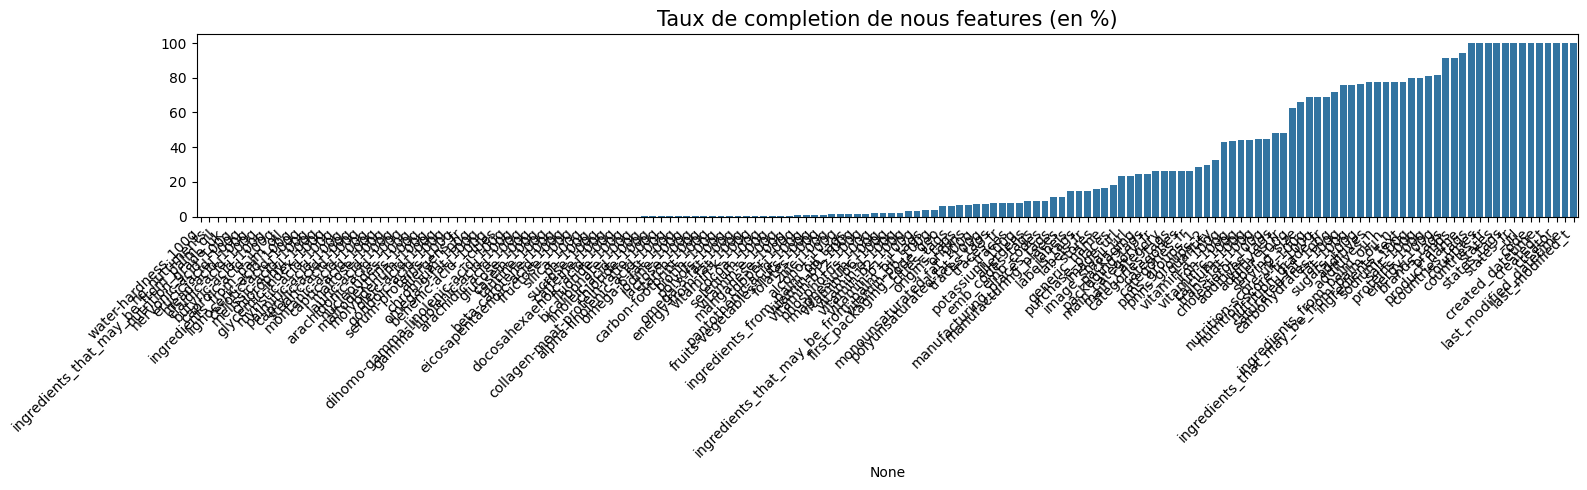

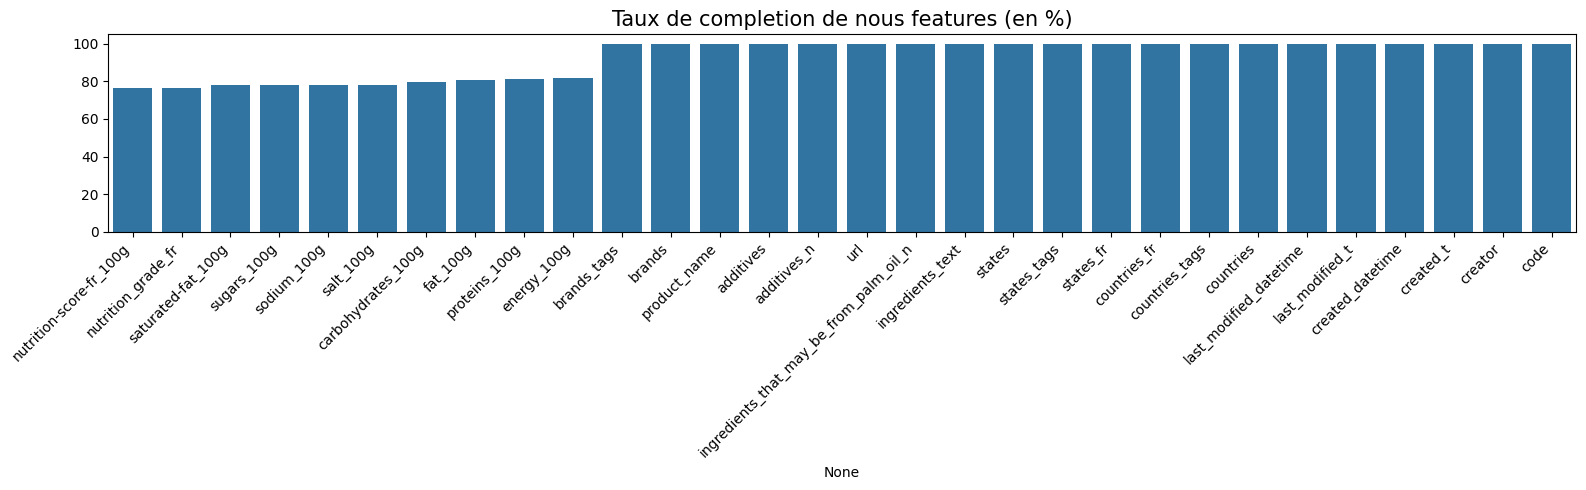

In [24]:
features = france_prodcuts_df.drop('ingredients_from_palm_oil_n', axis=1)

def show_feature_completion(features, filename):
    proportion_completion = 100 - features.isna().sum().divide(features.shape[0] / 100).sort_values(ascending=False)
    
    plt.figure(figsize=(16, 5))
    ax = sns.barplot(x = proportion_completion.index, y=proportion_completion.values)
    plt.title('Taux de completion de nous features (en %)', size=15)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(filename,  bbox_inches='tight')

show_feature_completion(data, 'images/feature_completionbefore.png')
show_feature_completion(features, 'images/feature_completionafter.png')

In [56]:
features = features.drop_duplicates(subset=['code', 'url'], keep='first')

In [22]:
# Valeures abérrantes, "outliers"

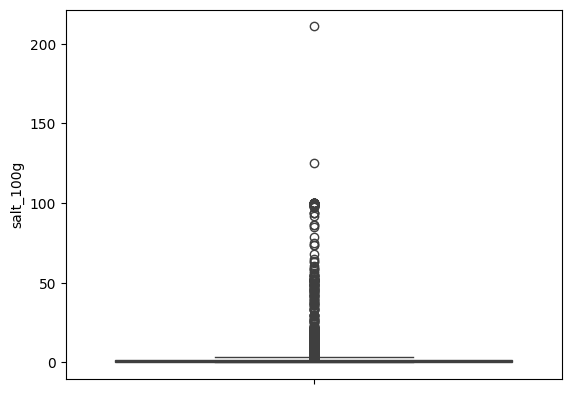

In [23]:
ax = sns.boxplot(y="salt_100g", data=features)

In [24]:
features.select_dtypes(include = ['int32','float64']).max()

additives_n                     31.0
energy_100g                3251373.0
fat_100g                       380.0
saturated-fat_100g             210.0
carbohydrates_100g             190.0
sugars_100g                    105.0
proteins_100g                   86.0
salt_100g                      211.0
sodium_100g                     83.0
nutrition-score-fr_100g         40.0
dtype: float64

In [52]:
# Verifier les valeurs retirees pour chaque colonnes pour s'assurer de ne pas enlever n'importe quoi
# Faire seuil specifique pour certaines colonnes ex: energie ne peux pas etre superieur a un certain seuil
def delete_outliers(dataframe):
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist():
        index_nan = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.995)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.005)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        index_nan_flat = [item for sublist in index_nan for item in sublist]

        index_nan_flat = list(dict.fromkeys(index_nan_flat))

        dataframe[column].loc[index_nan_flat] = np.nan

    # Specifics
    # Remove lines above maximum energy
    dataframe = dataframe[(dataframe['energy_100g'] < 900)]
            
    return dataframe

In [61]:
clean_features = delete_outliers(features)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_10044\845123422.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframe[column].loc[index_nan_flat] = np.nan
C:\Users\Rafael\AppData\Local\Temp\ipykernel_10044\845123422.py:17: SettingWithC

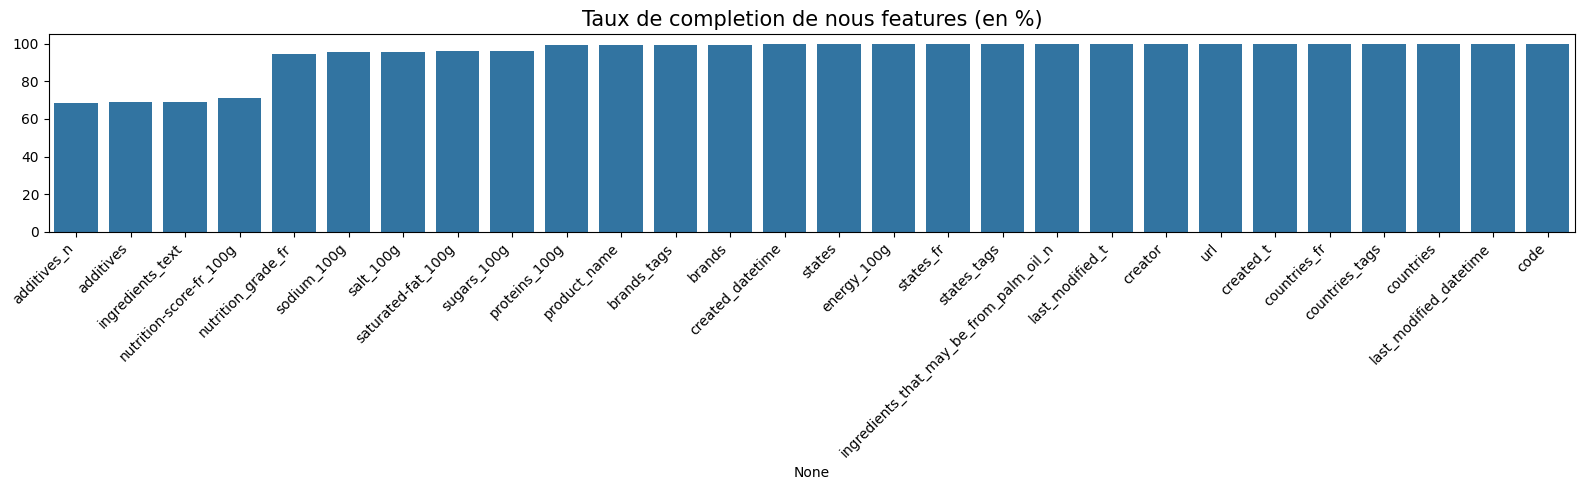

In [62]:
show_feature_completion(clean_features, 'images/features_after_ouliers_filter.png')

In [65]:
from sklearn.neighbors import KDTree

def impute_knn(dataframe):
    numeric_columns = dataframe.select_dtypes(['int32','float64']).columns
    imputable_columns = dataframe.select_dtypes(['int32', 'float64','category'])
    print('shape imputable columns : ', imputable_columns.shape)
    for column in imputable_columns:
        print('\n...imputation colonne ', column)
        #on identifie les indices des données manquantes pour la colonne du tour de boucle
        index_to_fill = dataframe[dataframe[column].isna()].index
        #on stocke le nombre de NaN pour comparer leur nombre avant et après le traitement
        nb_nan = dataframe[column].isna().sum()
        if nb_nan != 0 :
            #on détermine les colonnes pour lesquelles on va calculer les distances
            columns_to_calculate = dataframe.loc[index_to_fill[0], numeric_columns].dropna().index.tolist() 
            #on calcule le KDTree sur la base des données des autres colonnes, après suppression de TOUS les NaN
            
            print(dataframe.loc[index_to_fill[0], numeric_columns])
            tree = KDTree(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), leaf_size=2)
            print('...arbre calculé')
            valid_indices = dataframe[columns_to_calculate].dropna(axis=0).index
            #on détermine les distances/indices aux 10 plus proches voisins de tous les points du jeu de donnée
            dist, ind = tree.query(dataframe[columns_to_calculate].copy().dropna(axis=0).dropna(axis=1), k=10)
            print('...dimensions {}/indice {}calculés : '.format(dist.shape, ind.shape))
            print('index to fill : ', index_to_fill)
            #pour chaque point où on a des données manquantes, on impute la moyenne des 10 plus proches voisins 
            for i, x in enumerate(index_to_fill):
                if pd.api.types.is_categorical_dtype(dataframe[column]):
                    # Conversion des indices relatifs en indices absolus
                    nearest_indices = valid_indices[ind[i, :]]
                    vote = dataframe.loc[nearest_indices, column].value_counts().idxmax()
                    dataframe.at[x, column] = vote
                elif pd.api.types.is_numeric_dtype(dataframe[column]):
                    nearest_indices = valid_indices[ind[i, :]]
                    mean = dataframe.loc[nearest_indices, column].mean()
                    dataframe.at[x, column] = mean
        print('Colonne {} traitée, {} NaN initialement, {} NaN après imputation'.format(column, nb_nan, dataframe[column].isna().sum()))
    return dataframe

In [ ]:
knn_data = impute_knn(clean_features)

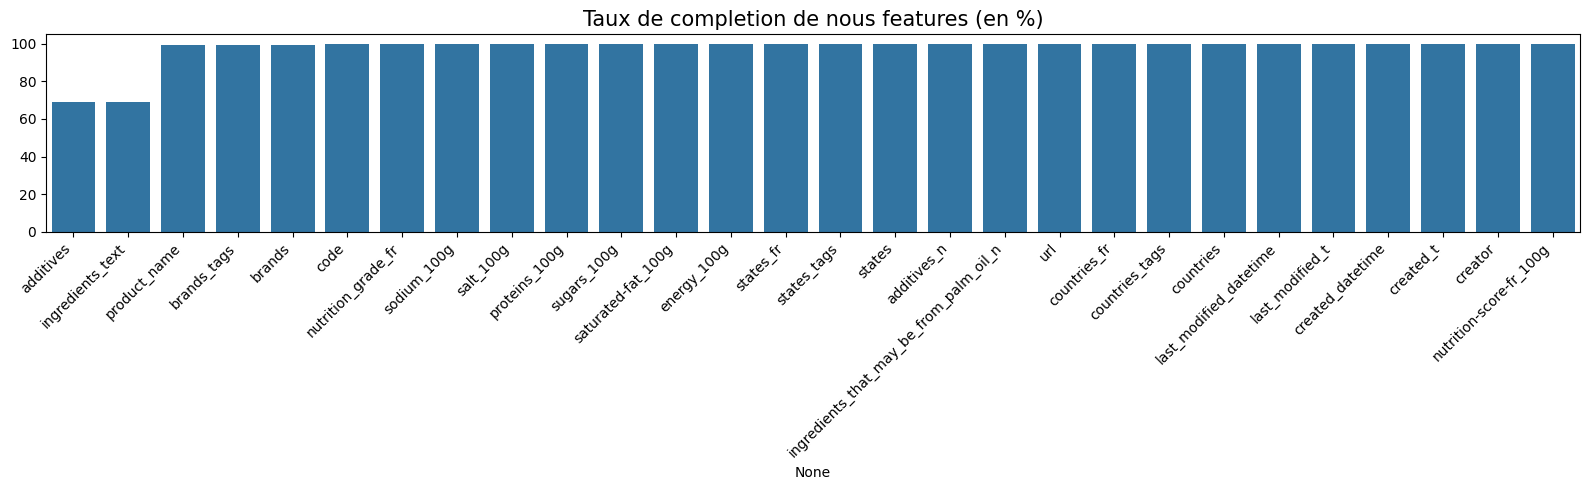

In [68]:
show_feature_completion(knn_data, 'images/features_after_knn.png')

In [ ]:
sns.set(font_scale=1.5)
numeric_columns = clean_features.select_dtypes(['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(15,8))
    chaine = 'Distribution de la variable ' + column + ' avant et après imputation des NaN'
    plt.title(chaine)
    
    sns.distplot(clean_features[column].dropna().head(10000))
    sns.distplot(knn_data[column].dropna())
    plt.legend(['distribution originale', 'distribution après imputation'])
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', clean_features[column].dropna().head(10000).mean(), ' / ', knn_data[column].mean())
    print('Ecart-Type (Avant / Après) : ', clean_features[column].dropna().head(10000).std(), ' / ', knn_data[column].std())
sns.set(font_scale=1)

In [33]:
#Save to excel

knn_data.to_csv('./cleaned_data.csv')

In [34]:
knn_data.shape

(19042, 30)